# Imports

In [89]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des data:
- 30 min (à faire)
- 5 min

In [90]:
!tree ..

..
├── 2021 10 15 Analyses 1
│   ├── 2021 10 15 test-5m.csv
│   ├── Scraping.ipynb
│   ├── Scraping.py
│   ├── test-15-1.csv
│   ├── test-5m.csv:Zone.Identifier
│   ├── test.csv
│   ├── Untitled.ipynb
│   ├── Velib01.png
│   └── Velib API.ipynb
├── 2021 10 17 Analyses 2
│   └── EDA 2021 10 17.ipynb
├── Data
│   ├── 2021 10 17 30m.csv
│   └── 2021 10 17 5m.csv
├── Scraping.py
├── test-30m-10-17.csv:Zone.Identifier
├── test-5m-10-17.csv:Zone.Identifier
└── test.csv

3 directories, 16 files


In [91]:
df = pd.read_csv("../Data/2021 10 17 5m.csv", index_col = "datetime",)

In [92]:
df.datetime = (pd.to_datetime(df.datetime, format = "%Y-%m-%d %H-%M"))

AttributeError: 'DataFrame' object has no attribute 'datetime'

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721728 entries, 2021-10-15 06-11 to 2021-10-17 06-35
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   stationCode  716000 non-null  float64
 1   meca         716000 non-null  float64
 2   elec         716000 non-null  float64
 3   park         721728 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 27.5+ MB


In [94]:
df.sample()

,stationCode,meca,elec,park
datetime,,,,
2021-10-16 21-35,21704.0,21.0,0.0,5


# Null values

In [95]:
df.sample(3)

,stationCode,meca,elec,park
datetime,,,,
2021-10-16 03-25,15108.0,16.0,4.0,1
2021-10-17 01-55,12039.0,31.0,1.0,4
2021-10-17 00-05,44006.0,6.0,10.0,17


In [96]:
df[df.meca.isnull()].sample(3)

,stationCode,meca,elec,park
datetime,,,,
2021-10-16 13-40,NaN,NaN,NaN,29
2021-10-16 14-40,NaN,NaN,NaN,24
2021-10-16 15-40,NaN,NaN,NaN,4


In [97]:
df.describe()

,stationCode,meca,elec,park
count,716000.000000,716000.000000,716000.000000,721728.000000
mean,18285.152933,7.567742,2.539289,19.728586
std,12064.891765,9.883795,2.700522,12.662771
min,1001.000000,0.000000,0.000000,0.000000
25%,11015.500000,1.000000,1.000000,11.000000
50%,16029.500000,4.000000,2.000000,19.000000
75%,21313.250000,11.000000,4.000000,27.000000
max,92008.000000,65.000000,26.000000,71.000000


In [98]:
df[df.meca.isnull() & df.datetime == '2021-10-16T12:40:00.000000000'].meca.unique()

AttributeError: 'DataFrame' object has no attribute 'datetime'

## Conclusions
- lines with datetime, park and no Station Codes
- they are linked to 4 unique times on October 16th: 
    - '2021-10-16T12:40:00.000000000', 
    - '2021-10-16T13:40:00.000000000',
    - '2021-10-16T14:40:00.000000000', 
    - '2021-10-16T15:40:00.000000000'
- 

# Suite

In [101]:
df.between_time("10-15 18:00", "10-17 06 00")

TypeError: Index must be DatetimeIndex

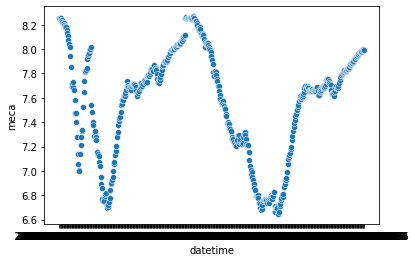

In [102]:
moyenne_meca = df.groupby("datetime").mean()["meca"]
sns.scatterplot(data = moyenne_meca)
ax = plt.gca()

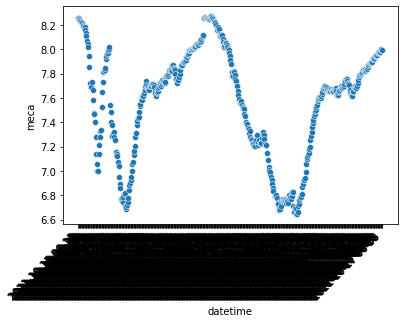

In [103]:
moyenne_meca = df.groupby("datetime").mean()["meca"]
sns.scatterplot(data = moyenne_meca)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), ha="right", rotation=45);

In [37]:
df.datetime.dtype

dtype('O')

In [107]:
df.groupby("stationCode").mean().sort_values(by = "meca")

,meca,elec,park
stationCode,,,
24003.0,0.000,0.000,0.000
31707.0,0.000,0.000,49.000
26009.0,0.000,0.000,0.000
12165.0,0.000,0.000,0.000
18112.0,0.000,0.000,26.000
...,...,...,...
15032.0,48.960,1.358,3.750
12106.0,50.576,4.588,5.666
13118.0,54.038,2.354,4.050
